<a href="https://colab.research.google.com/github/yasaswini-devi-2004/Machine_Learning/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      192  72    11      209  30.1     2.620   69      1
1         3      107  77    22      133  44.4     1.189   77      1
2        12       93  45    49       34  28.7     0.961   79      0
3        14      138  97    11      275  21.3     1.982   59      1
4        10      185  83    93      270  41.4     1.052   40      1
SVM Accuracy: 80.00%


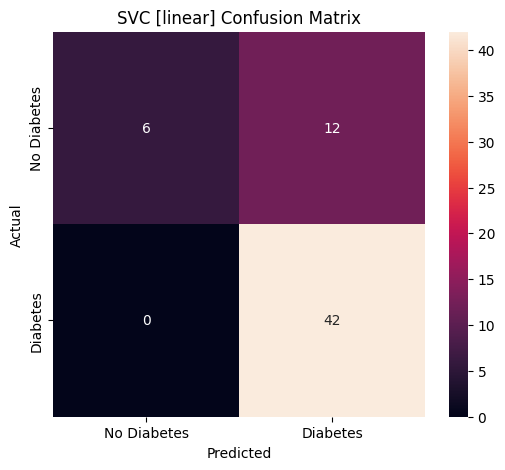

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Fix random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 300

# Generate random data with similar feature ranges
data = pd.DataFrame({
    'pregnant': np.random.randint(0, 15, size=n_samples),
    'glucose': np.random.randint(70, 200, size=n_samples),
    'bp': np.random.randint(40, 120, size=n_samples),
    'skin': np.random.randint(10, 100, size=n_samples),
    'insulin': np.random.randint(15, 300, size=n_samples),
    'bmi': np.round(np.random.uniform(15, 50, size=n_samples), 1),
    'pedigree': np.round(np.random.uniform(0.1, 3.0, size=n_samples), 3),
    'age': np.random.randint(20, 80, size=n_samples),
})

# Create labels with some correlation to features (like glucose > 130 or bmi > 30)
data['label'] = ((data['glucose'] > 130) | (data['bmi'] > 30)).astype(int)

# Add some noise by flipping about 10% labels randomly
flip_idx = np.random.choice(n_samples, size=int(0.1 * n_samples), replace=False)
data.loc[flip_idx, 'label'] = 1 - data.loc[flip_idx, 'label']

print(data.head())

# Features and target
X = data.drop('label', axis=1)
y = data['label']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train SVM classifier with linear kernel
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)

# Predict test set
y_pred = svm_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='rocket', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVC [linear] Confusion Matrix')
plt.show()


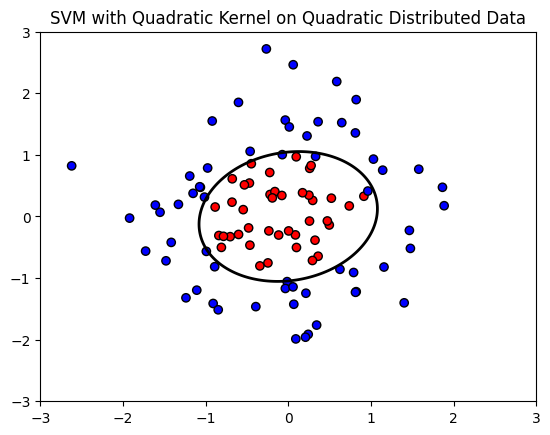

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Generate random data
np.random.seed(42)
X = np.random.randn(100, 2)

# Create labels based on a quadratic function (circle shape)
y = np.array([1 if x1**2 + x2**2 < 1 else 0 for x1, x2 in X])

# Train SVM with polynomial kernel degree=2 (quadratic)
clf = svm.SVC(kernel='poly', degree=2, C=1.0)
clf.fit(X, y)

# Plotting the data points and decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.title('SVM with Quadratic Kernel on Quadratic Distributed Data')
plt.show()


              precision    recall  f1-score   support

           0       0.90      0.64      0.75        14
           1       0.90      0.98      0.94        46

    accuracy                           0.90        60
   macro avg       0.90      0.81      0.84        60
weighted avg       0.90      0.90      0.89        60



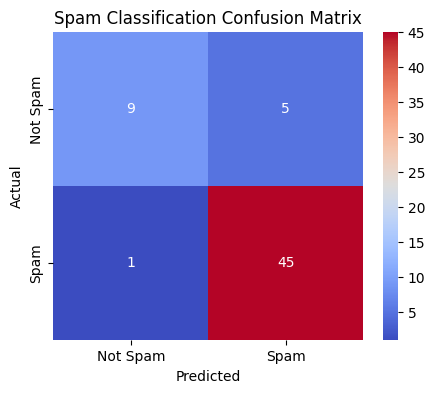

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate random email data
np.random.seed(42)
n_samples = 300

# Simulate features: word frequency (0-100), message length (20-2000 characters)
word_freq = np.random.uniform(0, 100, n_samples)
msg_length = np.random.uniform(20, 2000, n_samples)

# Simulate spam labels: Assume high word frequency and/or longer messages more likely spam
labels = ((word_freq > 50) | (msg_length > 1000)).astype(int)

# Add noise by flipping labels randomly
flip_idx = np.random.choice(n_samples, size=int(0.1 * n_samples), replace=False)
labels[flip_idx] = 1 - labels[flip_idx]

# Create DataFrame
data = pd.DataFrame({'word_freq': word_freq, 'msg_length': msg_length, 'label': labels})

# Split features and target
X = data[['word_freq', 'msg_length']]
y = data['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM classifier with linear kernel
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)

# Predict test data
y_pred = svm_clf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Spam Classification Confusion Matrix')
plt.show()
